# GA Project - Predicting House Prices in Ames, Iowa

# Part 1

# Step 1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set the size of display large enough to view all features
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

# Step 2 - Import Data

In [2]:
# load train and test since trainning data and testing data are separate

train = pd.read_csv('./datasets/train.csv')   # index_col = 'Id' makes 'Id'column as index
test = pd.read_csv('./datasets/test.csv')

In [3]:
train.shape

(2051, 81)

In [4]:
test.shape

(878, 80)

# Step 3 - Missing Data

## 3.1 For training data

In [5]:
train.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [6]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1911
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC      

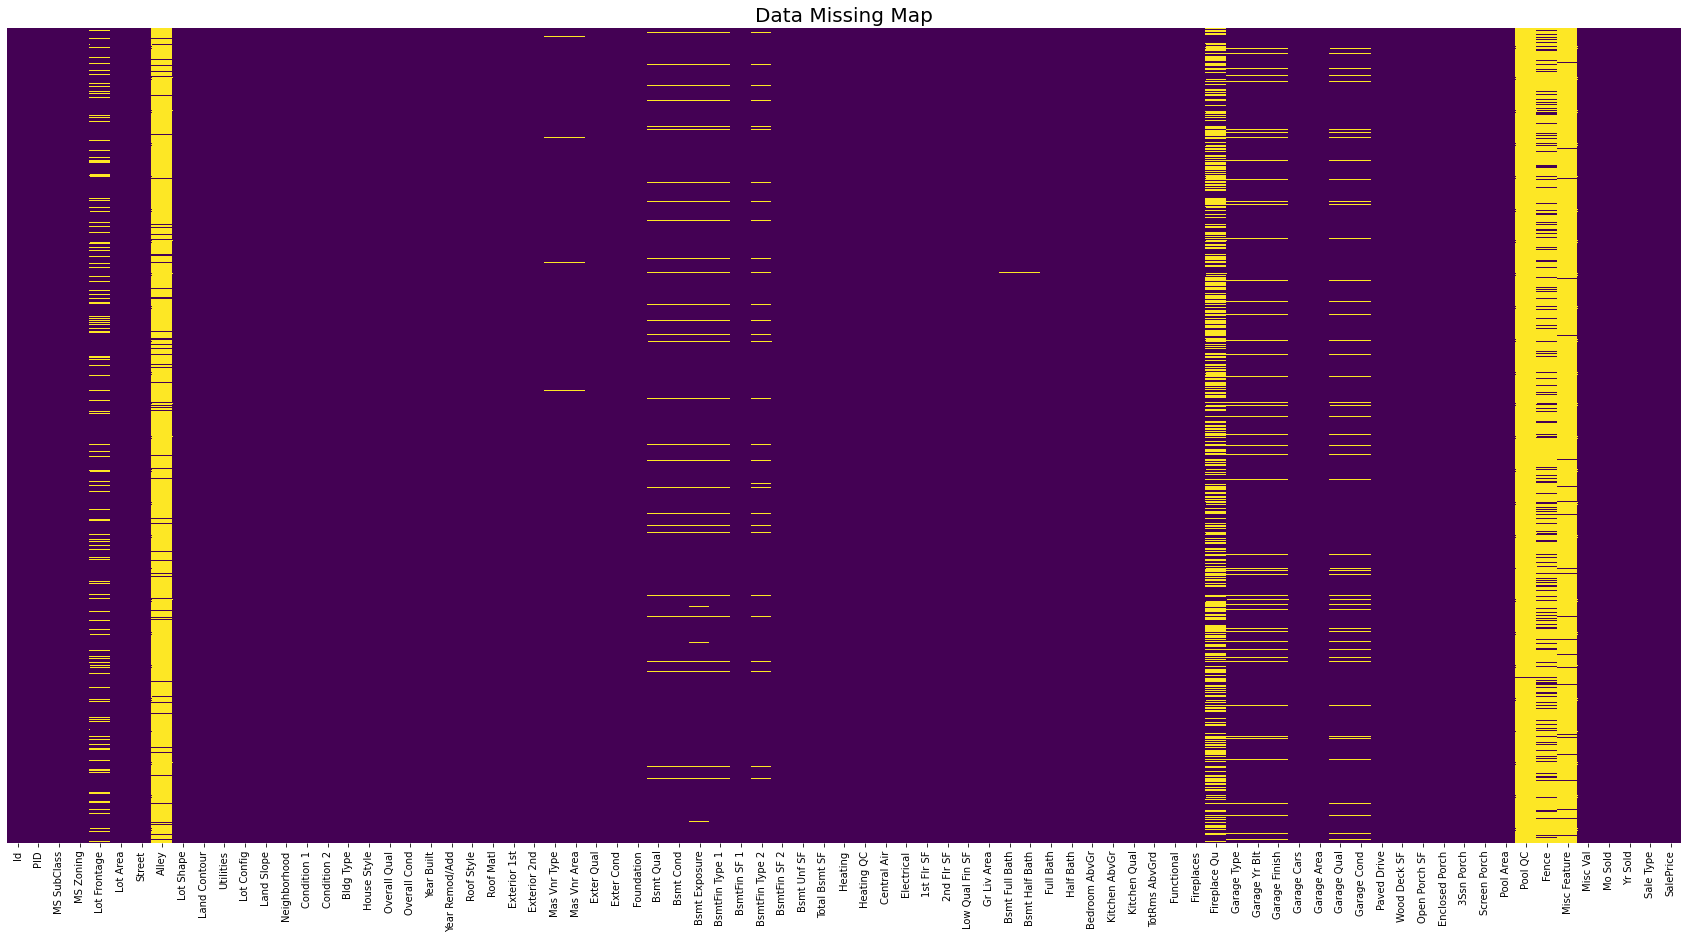

In [7]:
# using heatmap to visualize missing data of train
plt.figure(figsize=(30, 15))
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Data Missing Map', fontdict={'fontsize':20});

**Numerical tepys: using mean if missing**

Lot Frontage, Mas Vnr Area, BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, 
Bsmt Half Bath, Garage Yr Blt, Garage Cars, Garage Area


**Categorical types:**

    **using fill None if missing for nominal type**
    Mas Vnr Type, Garage Type(NA for no Garage)
    
    **using fill the most one if missing for ordinal type**
    Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1(NA for no basement), 
    BsmtFin Type 2(NA for no basement), Garage Finish(NA for no Garage), Garage Qual(NA for no Garage),
    Garage Cond(NA for no Garage)

## 3.1.2 Numerical
## Lot Frontage
**Fill nan as the mean value of this feature**

In [8]:
tain_Lot_Frontage_mean = train['Lot Frontage'].mean()
train['Lot Frontage'] = train['Lot Frontage'].fillna(tain_Lot_Frontage_mean)
train['Lot Frontage'].isnull().sum()

0

## Mas Vnr Area
**Fill nan as the mean value of this feature**

In [9]:
train_Mas_Vnr_Area_mean = train['Mas Vnr Area'].mean()
train['Mas Vnr Area'] = train['Mas Vnr Area'].fillna(train_Mas_Vnr_Area_mean)
train['Mas Vnr Area'].isnull().sum()

0

## Bsmt Full Bath
**Fill nan as the mean value of this feature**

In [10]:
bfb_mean = train['Bsmt Full Bath'].mean()
train['Bsmt Full Bath'] = train['Bsmt Full Bath'].fillna(bfb_mean)

## Bsmt Half Bath

**Fill nan as the mean value of this feature**

In [11]:
bhb_mean = train['Bsmt Half Bath'].mean()
train['Bsmt Half Bath'] = train['Bsmt Half Bath'].fillna(bhb_mean)

## BsmtFin SF 1
**Fill nan as the mean value of this feature**

In [12]:
mean_sf1 = train['BsmtFin SF 1'].mean()
train['BsmtFin SF 1'] = train['BsmtFin SF 1'].fillna(mean_sf1)

## BsmtFin SF 2 

In [13]:
mean_sf2 = train['BsmtFin SF 2'].mean()
train['BsmtFin SF 2'] = train['BsmtFin SF 2'].fillna(mean_sf2)

## Total Bsmt SF

In [14]:
mean_sf_t = train['Total Bsmt SF'].mean()
train['Total Bsmt SF'] = train['Total Bsmt SF'].fillna(mean_sf_t)

## Bsmt Unf SF
**Fill nan as the mean value of this feature**

In [15]:
Bsmt_Unf_SF_mean = train['Bsmt Unf SF'].mean()
train['Bsmt Unf SF'] = train['Bsmt Unf SF'].fillna(Bsmt_Unf_SF_mean)

## Garage Yr Blt
**Fill nan as the mean value of this feature**

In [16]:
arage_Yr_Bl_1 = round((train['Garage Yr Blt'].mean()), 0)

train['Garage Yr Blt'] = train['Garage Yr Blt'].fillna(arage_Yr_Bl_1)
train['Garage Yr Blt'].isnull().sum()

0

## Garage Cars
**Fill nan as the mean value of this feature**

In [17]:
Garage_Cars_mean = round((train['Garage Cars'].mean()), 0)

train['Garage Cars'] = train['Garage Cars'].fillna(Garage_Cars_mean)
train['Garage Cars'].isnull().sum()

0

## Garage Area
**Fill nan as the mean value of this feature**

In [18]:
Garage_Area_mean = round((train['Garage Area'].mean()), 0)

train['Garage Area'] = train['Garage Area'].fillna(Garage_Area_mean)
train['Garage Area'].isnull().sum()

0

## 3.1.3 Categorical

**using fill None if missing for nominal type**
Mas Vnr Type, Garage Type(NA for no Garage)

**using fill the most one if missing for ordinal type**
Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1(NA for no basement), 
BsmtFin Type 2(NA for no basement), Garage Finish(NA for no Garage), Garage Qual(NA for no Garage),
Garage Cond(NA for no Garage)

## Mas Vnr Type

In [19]:
train['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [20]:
train['Mas Vnr Type'].isnull().sum()

22

**Fill None of the missing because the most value is None**

In [21]:
train['Mas Vnr Type'] = train['Mas Vnr Type'].fillna('None')
train['Mas Vnr Type'].isnull().sum()

0

## Garage Type

In [22]:
train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

**Fill NA of the missing because the most value is NaN**

In [23]:
train['Garage Type'] = train['Garage Type'].fillna('NA')
train['Garage Type'].isnull().sum()

0

## Garage Finish

In [24]:
train['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

**Fill NA of the missing because the most value is NaN**

In [25]:
train['Garage Finish'] = train['Garage Finish'].fillna('NA')
train['Garage Finish'].isnull().sum()

0

## Garage Qual & Garage Cond

**Fill NA of the missing because the most value is NaN**

In [26]:
gg = ['Garage Qual', 'Garage Cond']
train[gg] = train[gg].fillna('NA')
train[gg].isnull().sum()

Garage Qual    0
Garage Cond    0
dtype: int64

## Bsmt Qual & Bsmt Cond

**Fill NA of the missing because the most value is NaN**

In [27]:
bb = ['Bsmt Qual','Bsmt Cond']
train[bb] = train[bb].fillna('NA')

## BsmtFin Type 1 & BsmtFin Type 2

**Fill NA of the missing because the most value is NaN**

In [28]:
bb1 = ['BsmtFin Type 1', 'BsmtFin Type 2']
train[bb1] = train[bb1].fillna('NA')

## Bsmt Exposure

**Fill NA of the missing because the most value is NaN**

In [29]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].fillna('NA')

In [30]:
train.drop(columns=['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature','PID',
                    'MS Zoning','Street'], inplace=True)

In [31]:
train.isnull().sum()

Id                 0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath    

In [32]:
train.shape

(2051, 73)

## 3.2 For testing data

In [33]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [34]:
test.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

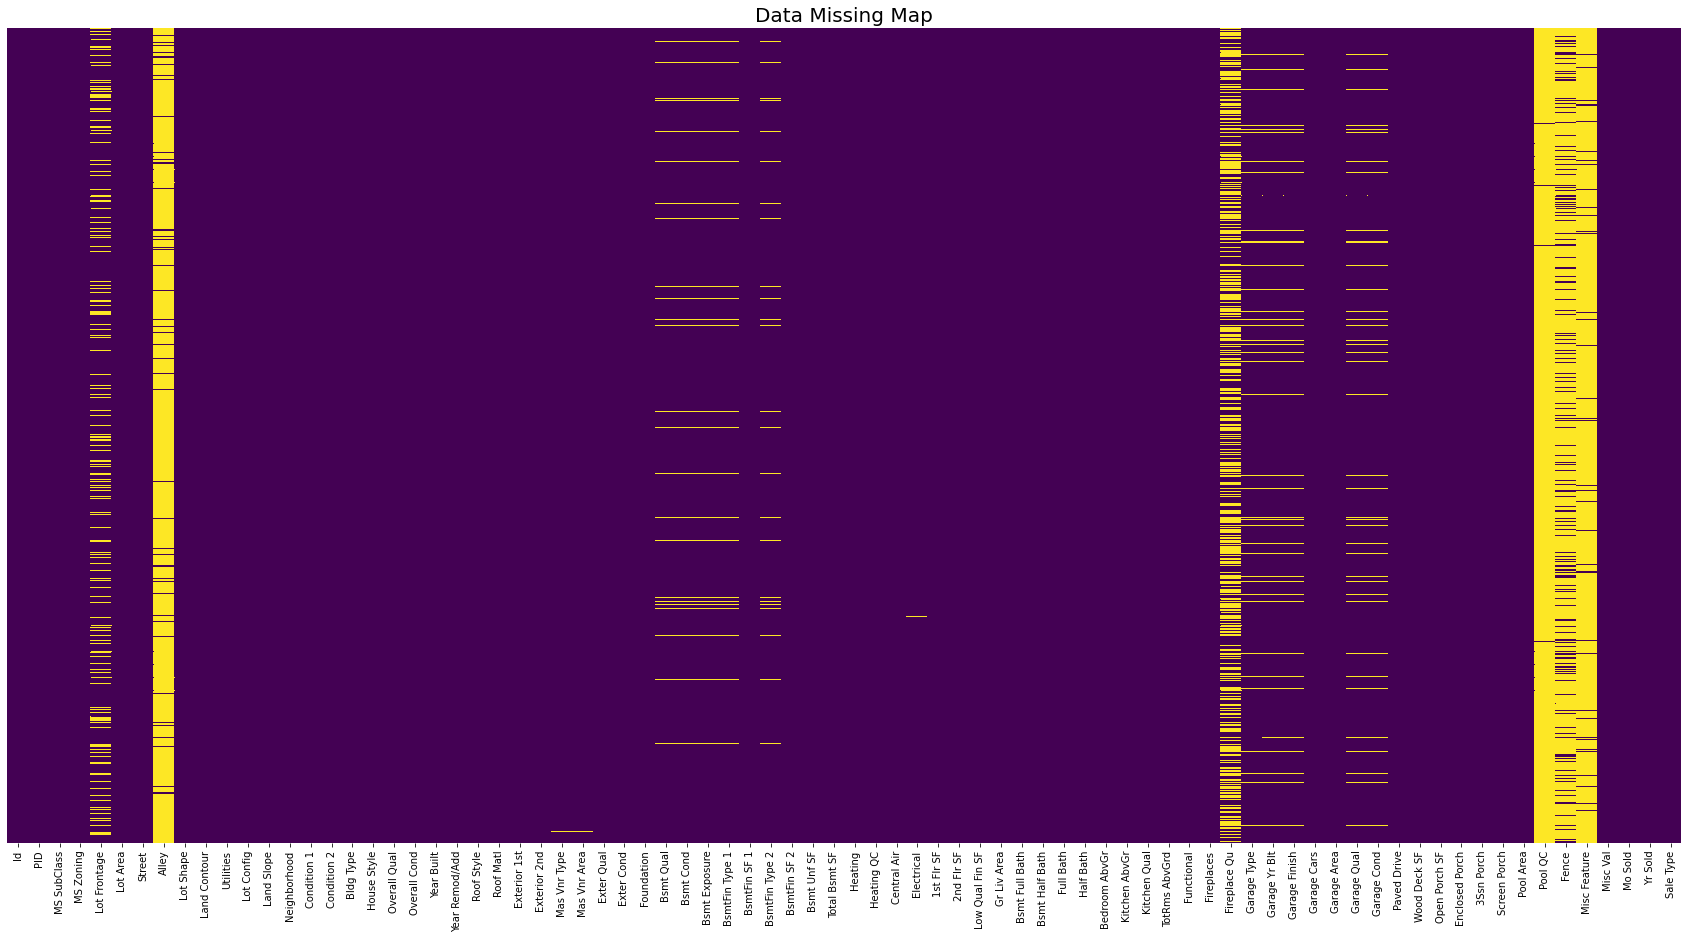

In [35]:
# using heatmap to visualize missing data of test
plt.figure(figsize=(30, 15))
sns.heatmap(test.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Data Missing Map', fontdict={'fontsize':20});

**Numerical tepys: using mean if missing**

    Lot Frontage, Mas Vnr Area, Garage Yr Blt


**Categorical types:**

    **using fill None if missing for nominal type**
    Mas Vnr Type, Garage Type(NA for no Garage)
    
    **using fill the most one if missing for ordinal type**
    Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1(NA for no basement), BsmtFin Type 2(NA for no basement), 
    Electrical, Garage Finish(NA for no Garage), Garage Qual(NA for no Garage), Garage Cond(NA for no Garage)

## 3.2.1 Numerical
## Lot Frontage
**Fill nan as the mean value of this feature**

In [36]:
test_Lot_Frontage_mean = test['Lot Frontage'].mean()
test['Lot Frontage'] = test['Lot Frontage'].fillna(test_Lot_Frontage_mean)
test['Lot Frontage'].isnull().sum()

0

## Mas Vnr Area
**Fill nan as the mean value of this feature**

In [37]:
test_Mas_Vnr_Area_mean = test['Mas Vnr Area'].mean()
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(test_Mas_Vnr_Area_mean)
test['Mas Vnr Area'].isnull().sum()

0

## Bsmt Full Bath & Bsmt Half Bath
**Fill nan as the mean value of this feature**

In [38]:
arage_Yr_Bl = round((test['Garage Yr Blt'].mean()), 0)

test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(arage_Yr_Bl)
test['Garage Yr Blt'].isnull().sum()

0

## Mas Vnr Type

In [39]:
test['Mas Vnr Type'].value_counts()

None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64

In [40]:
test['Mas Vnr Type'].isnull().sum()

1

**Fill None of the missing because the most value is None**

In [41]:
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna('None')
test['Mas Vnr Type'].isnull().sum()

0

## Garage Finish

In [42]:
test['Garage Finish'].isnull().sum()

45

**Fill NA of the missing because the most value is NaN**

In [43]:
test['Garage Finish'] = test['Garage Finish'].fillna('NA')
test['Garage Finish'].isnull().sum()

0

## Garage Type

In [44]:
test['Garage Type'].isnull().sum()

44

**Fill NA of the missing because the most value is NaN**

In [45]:
test['Garage Type'] = test['Garage Type'].fillna('NA')
test['Garage Type'].isnull().sum()

0

## Electrical

In [46]:
test['Electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [47]:
test['Electrical'].isnull().sum()

1

**Fill NA of the missing because the most value is NaN**

In [48]:
test['Electrical'] = test['Electrical'].fillna('SBrkr')
test['Electrical'].isnull().sum()

0

## Garage Qual & Garage Cond

**Fill the most of the missing data**

In [49]:
ggg = ['Garage Qual', 'Garage Cond']
test[ggg] = test[ggg].fillna('NA')
test[ggg].isnull().sum()

Garage Qual    0
Garage Cond    0
dtype: int64

## Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin Type 2

**Fill NA of the missing because the most value is NaN**

In [50]:
bbb = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
test[bbb] = test[bbb].fillna('NA')

In [51]:
test.drop(columns=['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature','PID','MS Zoning','Street'], inplace=True)

In [52]:
test.isnull().sum()

Id                 0
MS SubClass        0
Lot Frontage       0
Lot Area           0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath    

In [53]:
test.shape

(878, 72)

In [54]:
# Convert all columns to lowercase and replace spaces in column names.
# train.columns = train.columns.str.lower().str.replace(' ', '_')

In [55]:
# store acleaned data for part 2
%store train
%store test

Stored 'train' (DataFrame)
Stored 'test' (DataFrame)
